In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline


In [9]:
import yfinance as yf
import datetime as dt
stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 7, 1)

df = yf.download(stock, start, end)

C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_10152\1649083775.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545437,35.424706,26.900130,29.051494,855215656
2007-10-08,30.879335,33.645373,30.685227,33.645373,126671715
2007-10-09,32.982174,33.273335,29.229421,30.895512,116725709
2007-10-10,33.289505,33.968883,32.998344,33.839477,67931378
2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [11]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-06-24,285.950012,294.700012,285.350006,293.450012,15007849
2025-06-25,290.450012,291.100006,286.500000,286.500000,10838516
2025-06-26,293.500000,294.250000,289.750000,290.799988,10232220
2025-06-27,299.250000,300.700012,294.149994,295.000000,15523628
2025-06-30,299.899994,301.000000,296.250000,300.399994,8415241


In [14]:
df = df.reset_index()

In [15]:
df.head

<bound method NDFrame.head of Price  index       Date        Close         High          Low         Open  \
Ticker                  POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS   
0          0 2007-10-05    32.545437    35.424706    26.900130    29.051494   
1          1 2007-10-08    30.879335    33.645373    30.685227    33.645373   
2          2 2007-10-09    32.982174    33.273335    29.229421    30.895512   
3          3 2007-10-10    33.289505    33.968883    32.998344    33.839477   
4          4 2007-10-11    37.009907    38.821581    32.998345    38.821581   
...      ...        ...          ...          ...          ...          ...   
4366    4366 2025-06-24   285.950012   294.700012   285.350006   293.450012   
4367    4367 2025-06-25   290.450012   291.100006   286.500000   286.500000   
4368    4368 2025-06-26   293.500000   294.250000   289.750000   290.799988   
4369    4369 2025-06-27   299.250000   300.700012   294.149994   295.000000   
4370    4370 2025-06-3

In [16]:
df.columns

MultiIndex([( 'index',             ''),
            (  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [18]:
df.to_csv("powergrid.csv")


In [19]:
data01 = pd.read_csv("powergrid.csv")


In [20]:
data01.head()


,Price,index,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,0.0,2007-10-05,32.54543685913086,35.4247057864131,26.90012950730004,29.05149370148867,855215656
2,1,1.0,2007-10-08,30.879335403442383,33.64537299695017,30.68522665535057,33.64537299695017,126671715
3,2,2.0,2007-10-09,32.982173919677734,33.273334876563496,29.229420508905978,30.89551235079529,116725709
4,3,3.0,2007-10-10,33.28950500488281,33.968883374439955,32.99834410019465,33.83947682149577,67931378


In [25]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x = data01['Date'],
    open = data01['Open'],
    high = data01['High'],
    low = data01['Low'],
    close = data01['Close']
)])
fig.update_layout(xaxis_rangeslider_visible=False)


fig.show()


In [27]:
df = df.drop(['Date'], axis = 1)


C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_10152\3534138121.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [28]:
df.head()

Price,index,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,0,32.545437,35.424706,26.900130,29.051494,855215656
1,1,30.879335,33.645373,30.685227,33.645373,126671715
2,2,32.982174,33.273335,29.229421,30.895512,116725709
3,3,33.289505,33.968883,32.998344,33.839477,67931378
4,4,37.009907,38.821581,32.998345,38.821581,106320954


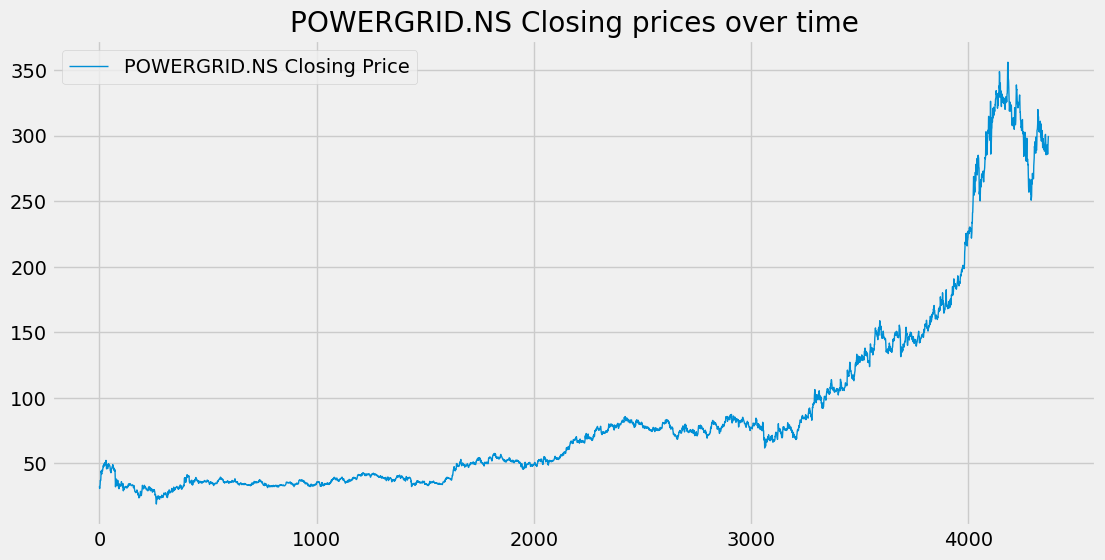

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

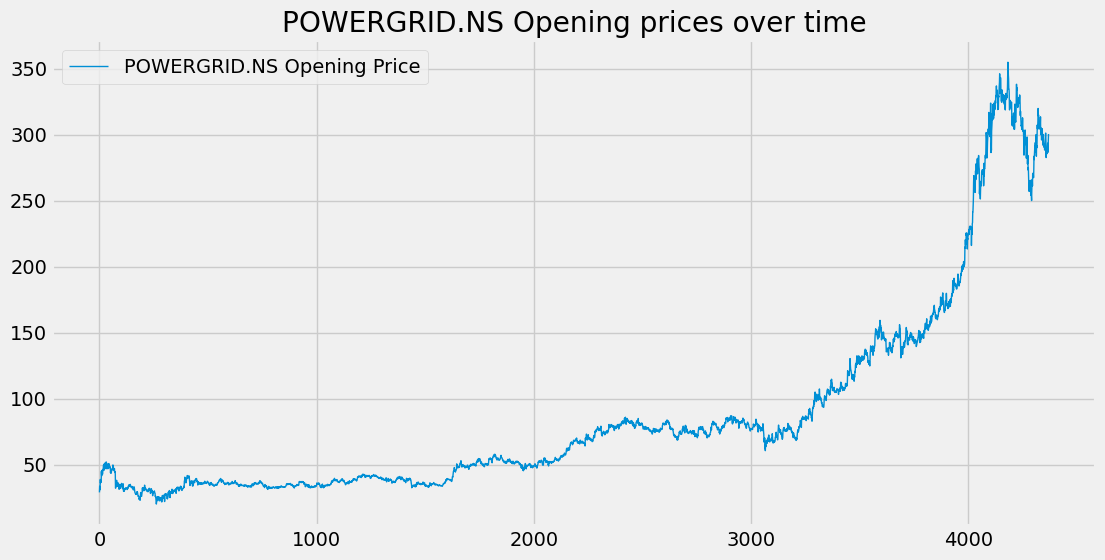

In [31]:

plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

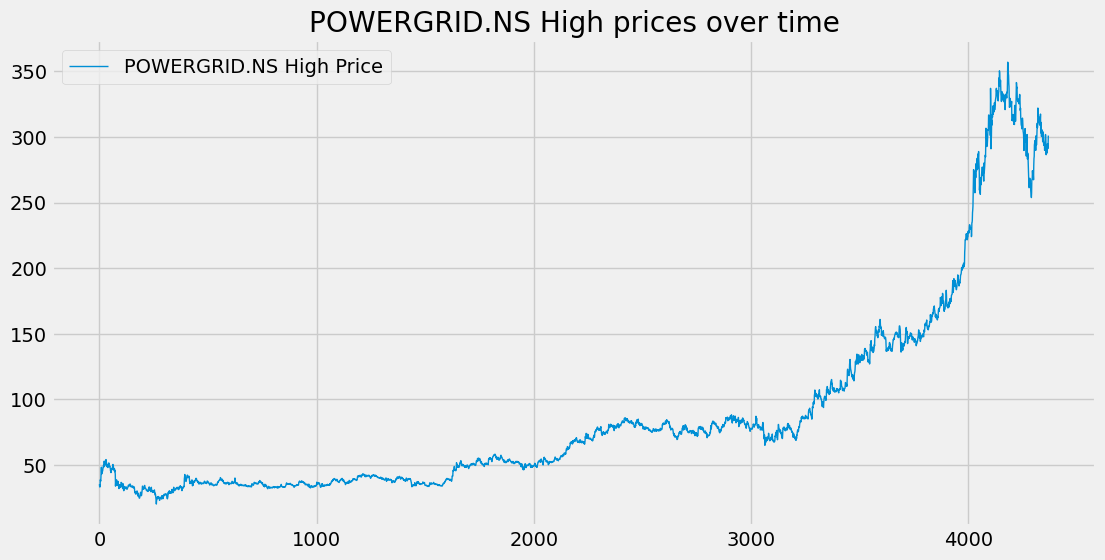

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

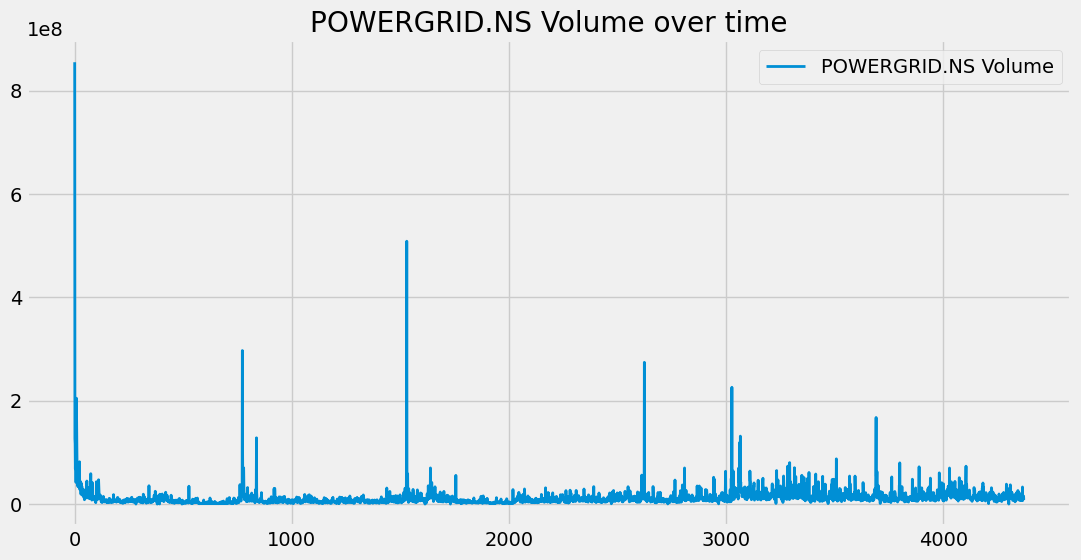

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [29]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [34]:

import pandas as pd
df01 = pd.DataFrame(temp_data)

In [35]:
df01.rolling(5).mean()


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [36]:
ma100 = df.Close.rolling(100).mean()


In [37]:
ma100


Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4366,286.946090
4367,287.043914
4368,287.133688
4369,287.206830


In [38]:
ma200 = df.Close.rolling(200).mean()


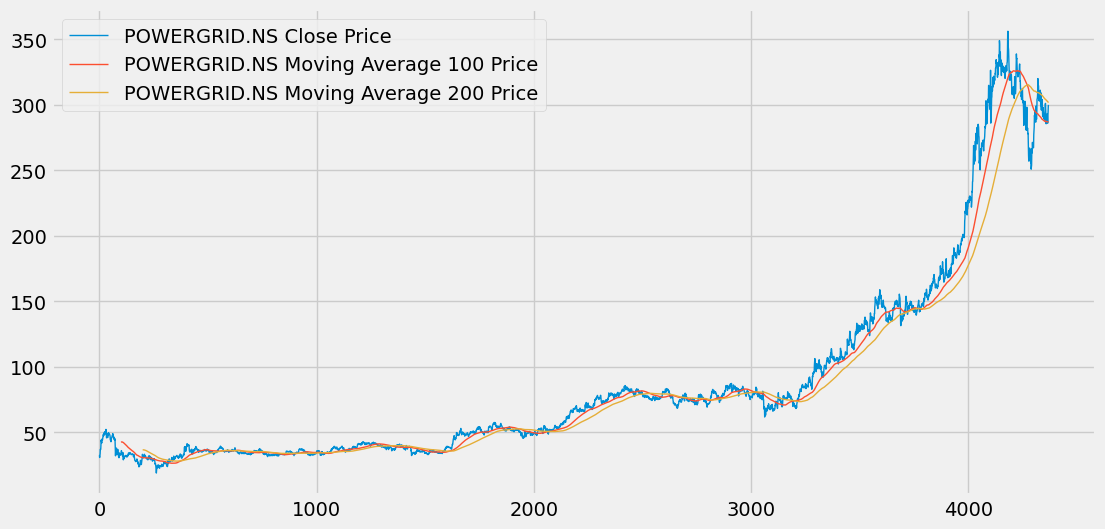

In [39]:

plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [40]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()


In [41]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()


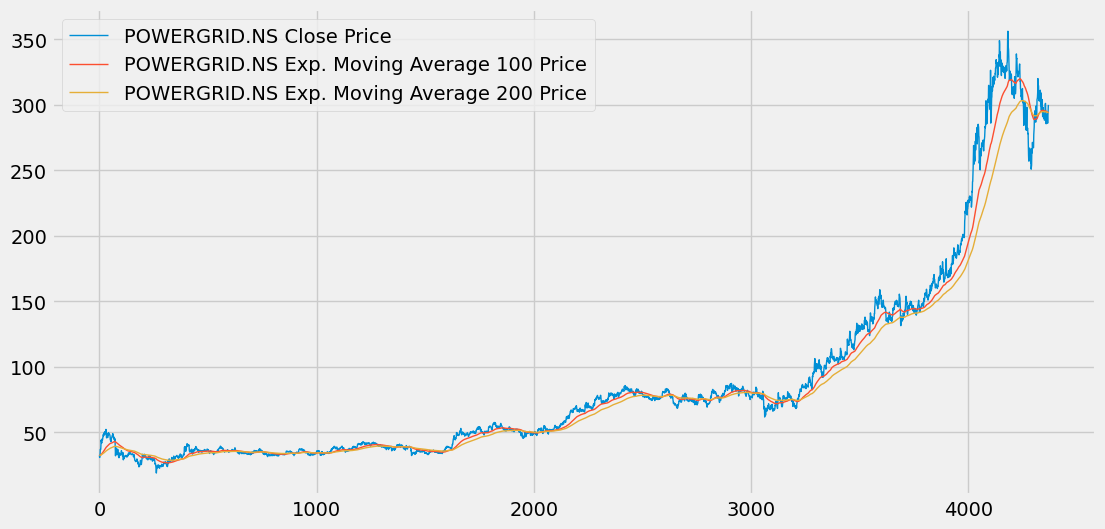

In [42]:

plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [44]:
#training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [45]:
data_training.shape


(3059, 1)

In [46]:
data_testing.shape


(1312, 1)

In [47]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [48]:
data_training_array = scaler.fit_transform(data_training)


In [49]:
data_training_array


array([[0.19808614],
       [0.17371823],
       [0.20447373],
       ...,
       [0.87390281],
       [0.8155871 ],
       [0.8183061 ]], shape=(3059, 1))

In [50]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [51]:
x_train.shape


(2959, 100, 1)

In [54]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [56]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [57]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 24s 165ms/step - loss: 0.0059
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - loss: 0.0049
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - loss: 0.0041
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - loss: 0.0046
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - loss: 0.0044


In [60]:
past_100_days = data_training.tail(100)

In [64]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [65]:
final_df.head()


Ticker,POWERGRID.NS
0,81.686508
1,83.690430
2,84.723404
3,85.219223
4,84.330887


In [66]:
input_data = scaler.fit_transform(final_df)


In [67]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [68]:
x_test.shape


(1312, 100, 1)

In [69]:
y_predicted = model.predict(x_test)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step


In [70]:
y_predicted.shape


(1312, 1)

In [71]:
scaler.scale_


array([0.00339719])

In [72]:

scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

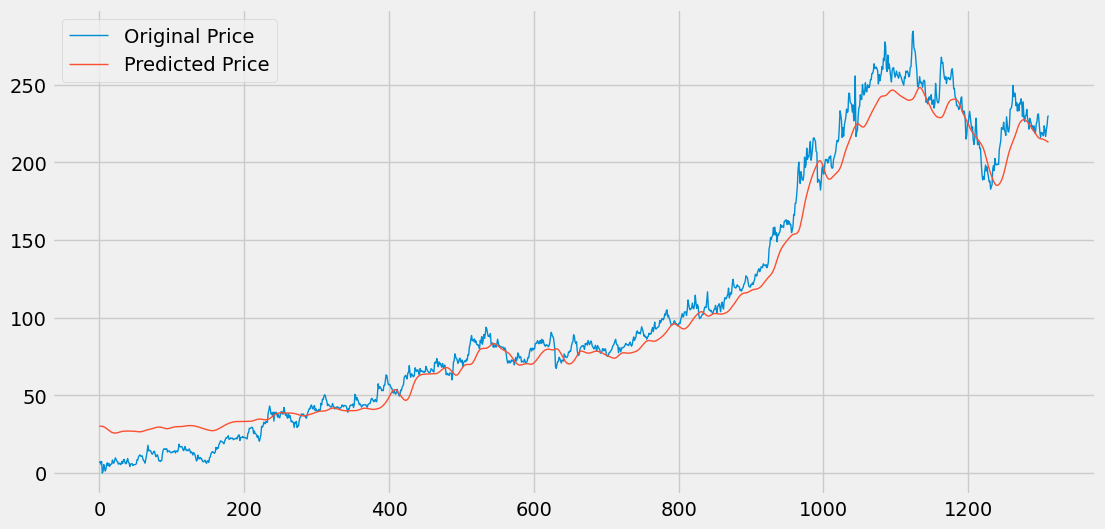

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [74]:
model.save('stock_dl_model.h5')
